# Pet Classification Model Using CNN

## Rohit Gaurav Mishra

### DESCRIPTION

Build a CNN model that classifies the given pet images correctly into dog and cat images. 

The project scope document specifies the requirements for the project “Pet Classification Model Using CNN.” Apart from specifying the functional and nonfunctional requirements for the project, it also serves as an input for project scoping.

#### 1. Importing required modules

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.image as mpimg

from sklearn.metrics import confusion_matrix

from warnings import filterwarnings

In [2]:
filterwarnings('ignore')

In [3]:
#dimensions of image
img_width, img_height = 150, 150
train_data_dir = 'data/train'
test_data_dir = 'data/test'
train_samples = 40
test_samples = 20
epochs = [50, 100, 200, 300]
batch_size = 20

#### 2. Set Hyper parameters

In [4]:
model = Sequential()

##### Input Layer

In [5]:
model.add(Input(shape = (img_width, img_height, 3)))

##### Convolutional layer 1 with 32 filters of kernel size[5,5]

In [6]:
model.add(Conv2D(32, (5, 5), activation='relu', name = 'ConvLayer1'))

##### Pooling layer 1 with pool size[2,2] and stride 2

In [7]:
model.add(MaxPooling2D(pool_size=(2, 2), strides = 2, name = 'MaxPool1'))

##### Convolutional layer 2 with 64 filters of kernel size[5,5]

In [8]:
model.add(Conv2D(64, (5, 5), activation='relu', name = 'ConvLayer2'))

##### Pooling layer 2 with pool size[2,2] and stride 2

In [9]:
model.add(MaxPooling2D(pool_size=(2, 2), strides = 2, name = 'MaxPool2'))

##### Dense layer whose output size is fixed in the hyper parameter: fc_size=32

In [10]:
model.add(Dense(32, activation = 'relu', name = 'Dense'))

##### Dropout layer with dropout probability 0.4

In [11]:
model.add(Dropout(0.4, name = 'Dropout'))
model.add(Flatten())

##### Predict the class by doing a softmax on the output of the dropout layers.

In [12]:
model.add(Dense(2, activation='softmax', name = 'DenseOutput'))

##### For the training step, define the loss function and minimize it

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### 3. Read image data

In [14]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

#Training Set
train_set = train_datagen.flow_from_directory(train_data_dir,
                                             target_size=(img_width, img_height),
                                             class_mode='categorical')
#Validation Set
test_set = test_datagen.flow_from_directory(test_data_dir,
                                           target_size=(img_width, img_height),
                                           class_mode='categorical',
                                           shuffle=False)

Found 40 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


#### 4. Run TensorFlow model

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
ConvLayer1 (Conv2D)          (None, 146, 146, 32)      2432      
_________________________________________________________________
MaxPool1 (MaxPooling2D)      (None, 73, 73, 32)        0         
_________________________________________________________________
ConvLayer2 (Conv2D)          (None, 69, 69, 64)        51264     
_________________________________________________________________
MaxPool2 (MaxPooling2D)      (None, 34, 34, 64)        0         
_________________________________________________________________
Dense (Dense)                (None, 34, 34, 32)        2080      
_________________________________________________________________
Dropout (Dropout)            (None, 34, 34, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

In [16]:
history = model.fit(train_set, validation_data = test_set, epochs=epochs[0])

Epoch 1/50
2/2 [==============================] - 1s 394ms/step - loss: 0.9946 - accuracy: 0.3750 - val_loss: 0.7016 - val_accuracy: 0.5000
Epoch 2/50
2/2 [==============================] - 1s 343ms/step - loss: 0.7108 - accuracy: 0.4500 - val_loss: 0.7072 - val_accuracy: 0.5000
Epoch 3/50
2/2 [==============================] - 1s 386ms/step - loss: 0.6996 - accuracy: 0.4750 - val_loss: 0.6973 - val_accuracy: 0.5000
Epoch 4/50
2/2 [==============================] - 1s 426ms/step - loss: 0.7053 - accuracy: 0.5000 - val_loss: 0.6874 - val_accuracy: 0.5000
Epoch 5/50
2/2 [==============================] - 0s 156ms/step - loss: 0.6993 - accuracy: 0.4500 - val_loss: 0.6828 - val_accuracy: 0.5500
Epoch 6/50
2/2 [==============================] - 0s 150ms/step - loss: 0.6797 - accuracy: 0.5500 - val_loss: 0.6797 - val_accuracy: 0.5000
Epoch 7/50
2/2 [==============================] - 1s 344ms/step - loss: 0.6731 - accuracy: 0.5500 - val_loss: 0.6726 - val_accuracy: 0.5500
Epoch 8/50
2/2 [====

#### For epoch=100

In [17]:
history = model.fit(train_set, validation_data = test_set, epochs=epochs[1])

Epoch 1/100
2/2 [==============================] - 0s 152ms/step - loss: 0.2229 - accuracy: 0.9000 - val_loss: 2.0829 - val_accuracy: 0.4500
Epoch 2/100
2/2 [==============================] - 1s 354ms/step - loss: 0.0968 - accuracy: 0.9750 - val_loss: 1.7175 - val_accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 1s 353ms/step - loss: 0.0822 - accuracy: 1.0000 - val_loss: 1.7097 - val_accuracy: 0.5500
Epoch 4/100
2/2 [==============================] - 1s 380ms/step - loss: 0.1034 - accuracy: 0.9750 - val_loss: 1.5909 - val_accuracy: 0.5500
Epoch 5/100
2/2 [==============================] - 1s 354ms/step - loss: 0.0946 - accuracy: 0.9750 - val_loss: 1.7393 - val_accuracy: 0.6000
Epoch 6/100
2/2 [==============================] - 0s 151ms/step - loss: 0.0513 - accuracy: 0.9750 - val_loss: 2.1667 - val_accuracy: 0.5500
Epoch 7/100
2/2 [==============================] - 0s 153ms/step - loss: 0.1077 - accuracy: 0.9500 - val_loss: 2.1623 - val_accuracy: 0.5000
Epoch 8/100
2

Epoch 59/100
2/2 [==============================] - 1s 347ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 3.4521 - val_accuracy: 0.5000
Epoch 60/100
2/2 [==============================] - 1s 343ms/step - loss: 8.6494e-04 - accuracy: 1.0000 - val_loss: 3.4932 - val_accuracy: 0.4500
Epoch 61/100
2/2 [==============================] - 0s 150ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 3.5337 - val_accuracy: 0.4500
Epoch 62/100
2/2 [==============================] - 1s 348ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 3.5480 - val_accuracy: 0.4500
Epoch 63/100
2/2 [==============================] - 0s 158ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 3.5635 - val_accuracy: 0.4500
Epoch 64/100
2/2 [==============================] - 1s 347ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 3.5888 - val_accuracy: 0.4500
Epoch 65/100
2/2 [==============================] - 1s 336ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 3.6129 - val_accuracy: 0.4500
Ep

#### For epoch=200

In [18]:
history = model.fit(train_set, validation_data = test_set, epochs=epochs[2])

Epoch 1/200
2/2 [==============================] - 1s 344ms/step - loss: 2.9480e-04 - accuracy: 1.0000 - val_loss: 3.9466 - val_accuracy: 0.5500
Epoch 2/200
2/2 [==============================] - 0s 153ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 3.8982 - val_accuracy: 0.5500
Epoch 3/200
2/2 [==============================] - 1s 348ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 3.8222 - val_accuracy: 0.5500
Epoch 4/200
2/2 [==============================] - 0s 150ms/step - loss: 7.9797e-04 - accuracy: 1.0000 - val_loss: 3.7194 - val_accuracy: 0.5500
Epoch 5/200
2/2 [==============================] - 0s 150ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 3.6078 - val_accuracy: 0.5000
Epoch 6/200
2/2 [==============================] - 1s 344ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 3.5368 - val_accuracy: 0.5000
Epoch 7/200
2/2 [==============================] - 0s 150ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 3.5547 - val_accuracy: 0.5000
Epoch

2/2 [==============================] - 1s 352ms/step - loss: 3.9075e-04 - accuracy: 1.0000 - val_loss: 4.5037 - val_accuracy: 0.5500
Epoch 114/200
2/2 [==============================] - 0s 155ms/step - loss: 1.2944e-04 - accuracy: 1.0000 - val_loss: 4.5051 - val_accuracy: 0.6000
Epoch 115/200
2/2 [==============================] - 1s 353ms/step - loss: 1.3686e-04 - accuracy: 1.0000 - val_loss: 4.5100 - val_accuracy: 0.6000
Epoch 116/200
2/2 [==============================] - 0s 154ms/step - loss: 1.8259e-04 - accuracy: 1.0000 - val_loss: 4.5182 - val_accuracy: 0.5500
Epoch 117/200
2/2 [==============================] - 1s 365ms/step - loss: 1.8303e-04 - accuracy: 1.0000 - val_loss: 4.5334 - val_accuracy: 0.6000
Epoch 118/200
2/2 [==============================] - 1s 352ms/step - loss: 4.9666e-05 - accuracy: 1.0000 - val_loss: 4.5494 - val_accuracy: 0.6000
Epoch 119/200
2/2 [==============================] - 1s 355ms/step - loss: 1.1110e-04 - accuracy: 1.0000 - val_loss: 4.5627 - val_ac

Epoch 169/200
2/2 [==============================] - 0s 153ms/step - loss: 4.0891e-05 - accuracy: 1.0000 - val_loss: 4.3592 - val_accuracy: 0.6000
Epoch 170/200
2/2 [==============================] - 1s 351ms/step - loss: 1.3165e-04 - accuracy: 1.0000 - val_loss: 4.3460 - val_accuracy: 0.6000
Epoch 171/200
2/2 [==============================] - 0s 155ms/step - loss: 5.4731e-05 - accuracy: 1.0000 - val_loss: 4.3402 - val_accuracy: 0.6000
Epoch 172/200
2/2 [==============================] - 1s 363ms/step - loss: 1.0296e-04 - accuracy: 1.0000 - val_loss: 4.3444 - val_accuracy: 0.6000
Epoch 173/200
2/2 [==============================] - 1s 356ms/step - loss: 9.4538e-05 - accuracy: 1.0000 - val_loss: 4.3502 - val_accuracy: 0.6000
Epoch 174/200
2/2 [==============================] - 1s 353ms/step - loss: 4.0724e-05 - accuracy: 1.0000 - val_loss: 4.3568 - val_accuracy: 0.6000
Epoch 175/200
2/2 [==============================] - 0s 152ms/step - loss: 1.5206e-04 - accuracy: 1.0000 - val_loss: 4

#### For epoch=300

In [19]:
history = model.fit(train_set, validation_data = test_set, epochs=epochs[3])

Epoch 1/300
2/2 [==============================] - 0s 164ms/step - loss: 1.2560e-04 - accuracy: 1.0000 - val_loss: 4.4984 - val_accuracy: 0.5000
Epoch 2/300
2/2 [==============================] - 1s 385ms/step - loss: 1.2984e-04 - accuracy: 1.0000 - val_loss: 4.5165 - val_accuracy: 0.5000
Epoch 3/300
2/2 [==============================] - 0s 163ms/step - loss: 9.3014e-05 - accuracy: 1.0000 - val_loss: 4.5317 - val_accuracy: 0.5000
Epoch 4/300
2/2 [==============================] - 0s 167ms/step - loss: 6.8141e-05 - accuracy: 1.0000 - val_loss: 4.5414 - val_accuracy: 0.5000
Epoch 5/300
2/2 [==============================] - 1s 390ms/step - loss: 2.8495e-05 - accuracy: 1.0000 - val_loss: 4.5487 - val_accuracy: 0.5000
Epoch 6/300
2/2 [==============================] - 0s 162ms/step - loss: 2.3836e-04 - accuracy: 1.0000 - val_loss: 4.5538 - val_accuracy: 0.5000
Epoch 7/300
2/2 [==============================] - 1s 376ms/step - loss: 6.9496e-05 - accuracy: 1.0000 - val_loss: 4.5631 - val_ac

2/2 [==============================] - 1s 369ms/step - loss: 5.2063e-05 - accuracy: 1.0000 - val_loss: 4.7533 - val_accuracy: 0.6000
Epoch 114/300
2/2 [==============================] - 1s 395ms/step - loss: 4.2735e-05 - accuracy: 1.0000 - val_loss: 4.7582 - val_accuracy: 0.6000
Epoch 115/300
2/2 [==============================] - 0s 161ms/step - loss: 4.9073e-05 - accuracy: 1.0000 - val_loss: 4.7614 - val_accuracy: 0.6000
Epoch 116/300
2/2 [==============================] - 0s 178ms/step - loss: 7.6427e-05 - accuracy: 1.0000 - val_loss: 4.7566 - val_accuracy: 0.6000
Epoch 117/300
2/2 [==============================] - 1s 369ms/step - loss: 2.7253e-04 - accuracy: 1.0000 - val_loss: 4.7558 - val_accuracy: 0.6000
Epoch 118/300
2/2 [==============================] - 0s 159ms/step - loss: 2.8295e-05 - accuracy: 1.0000 - val_loss: 4.7596 - val_accuracy: 0.6000
Epoch 119/300
2/2 [==============================] - 1s 380ms/step - loss: 4.7164e-05 - accuracy: 1.0000 - val_loss: 4.7646 - val_ac

Epoch 169/300
2/2 [==============================] - 0s 161ms/step - loss: 1.6105e-04 - accuracy: 1.0000 - val_loss: 4.9883 - val_accuracy: 0.6000
Epoch 170/300
2/2 [==============================] - 1s 386ms/step - loss: 3.9554e-05 - accuracy: 1.0000 - val_loss: 4.9599 - val_accuracy: 0.6000
Epoch 171/300
2/2 [==============================] - 0s 160ms/step - loss: 8.9018e-06 - accuracy: 1.0000 - val_loss: 4.9395 - val_accuracy: 0.6000
Epoch 172/300
2/2 [==============================] - 1s 384ms/step - loss: 7.8378e-05 - accuracy: 1.0000 - val_loss: 4.9553 - val_accuracy: 0.6000
Epoch 173/300
2/2 [==============================] - 1s 386ms/step - loss: 3.4509e-05 - accuracy: 1.0000 - val_loss: 4.9707 - val_accuracy: 0.6000
Epoch 174/300
2/2 [==============================] - 0s 163ms/step - loss: 8.7334e-05 - accuracy: 1.0000 - val_loss: 4.9907 - val_accuracy: 0.6000
Epoch 175/300
2/2 [==============================] - 1s 371ms/step - loss: 2.3051e-05 - accuracy: 1.0000 - val_loss: 5

Epoch 225/300
2/2 [==============================] - 0s 163ms/step - loss: 1.8804e-05 - accuracy: 1.0000 - val_loss: 5.0070 - val_accuracy: 0.6000
Epoch 226/300
2/2 [==============================] - 0s 160ms/step - loss: 1.1452e-05 - accuracy: 1.0000 - val_loss: 5.0071 - val_accuracy: 0.6000
Epoch 227/300
2/2 [==============================] - 0s 161ms/step - loss: 1.8446e-04 - accuracy: 1.0000 - val_loss: 5.0555 - val_accuracy: 0.6000
Epoch 228/300
2/2 [==============================] - 0s 163ms/step - loss: 5.4504e-05 - accuracy: 1.0000 - val_loss: 5.0991 - val_accuracy: 0.6000
Epoch 229/300
2/2 [==============================] - 0s 160ms/step - loss: 8.9692e-05 - accuracy: 1.0000 - val_loss: 5.1272 - val_accuracy: 0.6000
Epoch 230/300
2/2 [==============================] - 1s 361ms/step - loss: 2.5710e-05 - accuracy: 1.0000 - val_loss: 5.1506 - val_accuracy: 0.6000
Epoch 231/300
2/2 [==============================] - 0s 160ms/step - loss: 2.7308e-05 - accuracy: 1.0000 - val_loss: 5

Epoch 281/300
2/2 [==============================] - 0s 162ms/step - loss: 1.5890e-05 - accuracy: 1.0000 - val_loss: 5.2834 - val_accuracy: 0.6000
Epoch 282/300
2/2 [==============================] - 1s 367ms/step - loss: 6.5601e-05 - accuracy: 1.0000 - val_loss: 5.2866 - val_accuracy: 0.6000
Epoch 283/300
2/2 [==============================] - 1s 363ms/step - loss: 5.6381e-05 - accuracy: 1.0000 - val_loss: 5.2815 - val_accuracy: 0.6000
Epoch 284/300
2/2 [==============================] - 1s 366ms/step - loss: 2.5218e-05 - accuracy: 1.0000 - val_loss: 5.2771 - val_accuracy: 0.6000
Epoch 285/300
2/2 [==============================] - 1s 361ms/step - loss: 2.3410e-05 - accuracy: 1.0000 - val_loss: 5.2745 - val_accuracy: 0.6000
Epoch 286/300
2/2 [==============================] - 1s 378ms/step - loss: 1.7874e-05 - accuracy: 1.0000 - val_loss: 5.2777 - val_accuracy: 0.6000
Epoch 287/300
2/2 [==============================] - 1s 503ms/step - loss: 7.5756e-06 - accuracy: 1.0000 - val_loss: 5

In [20]:
model.evaluate(test_set)

1/1 [==============================] - 0s 1ms/step - loss: 5.1470 - accuracy: 0.6000


[5.146993637084961, 0.6000000238418579]

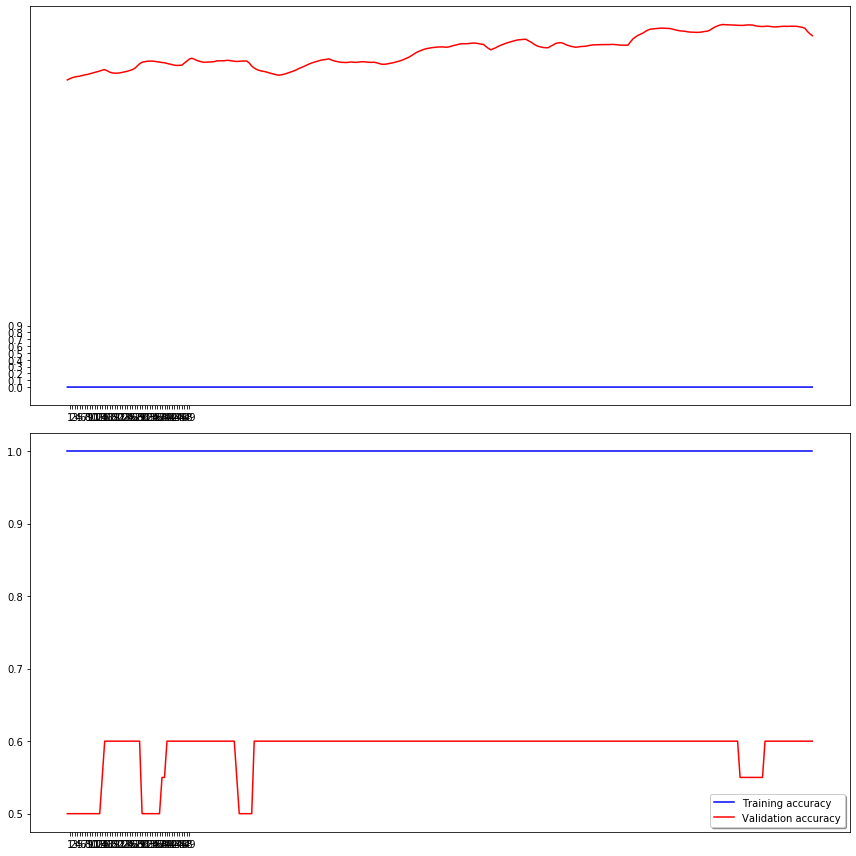

In [21]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="Validation loss")
ax1.set_xticks(np.arange(1, epochs[0], 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs[0], 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [22]:
import os

filenames_dog_test = os.listdir("data/test/dogs")
filenames_cats_test = os.listdir("data/test/cats")
filename_dog = []
filename_cat = []
for filename in filenames_dog_test:
    filename_dog.append(filename)

for filename in filenames_cats_test:
    filename_cat.append(filename)

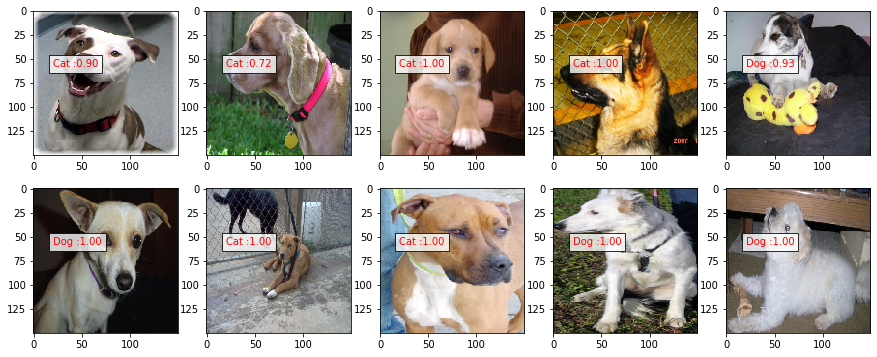

In [23]:
fig=plt.figure(figsize=(15, 6))
columns = 5
rows = 2
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img1 = image.load_img('data/test/dogs/'+filename_dog[i], target_size=(img_width, img_height))
    img = image.img_to_array(img1)
    img = img/255
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img, batch_size=None,steps=1) #gives all class prob.
    if(prediction[0][0]>0.5):
        value ='Dog :%1.2f'%(prediction[0,0])
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    else:
        value ='Cat :%1.2f'%(1.0-prediction[0,0])
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(img1)

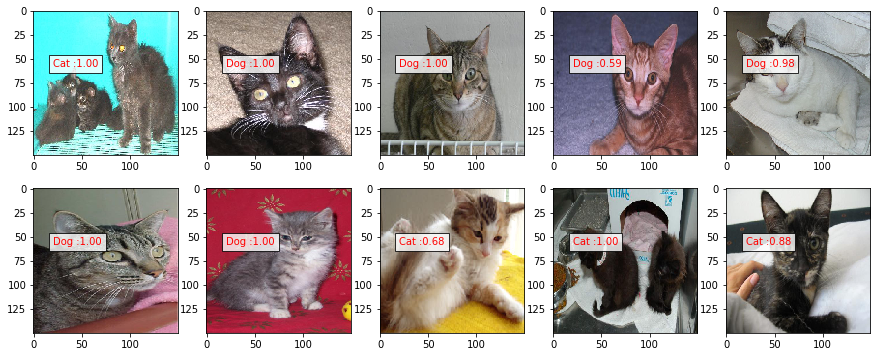

In [24]:
fig=plt.figure(figsize=(15, 6))
columns = 5
rows = 2
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img1 = image.load_img('data/test/cats/'+filename_dog[i], target_size=(img_width, img_height))
    img = image.img_to_array(img1)
    img = img/255
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img, batch_size=None,steps=1) #gives all class prob.
    if(prediction[0][0]>0.5):
        value ='Dog :%1.2f'%(prediction[0,0])
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    else:
        value ='Cat :%1.2f'%(1.0-prediction[0,0])
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(img1)

In [25]:
x1 = model.evaluate(train_set)
x2 = model.evaluate(test_set)

1/1 [==============================] - 0s 1ms/step - loss: 5.1470 - accuracy: 0.6000


In [26]:
print('Training Accuracy  : %1.2f%%     Training loss  : %1.6f'%(x1[1]*100,x1[0]))
print('Validation Accuracy: %1.2f%%     Validation loss: %1.6f'%(x2[1]*100,x2[0]))

Training Accuracy  : 100.00%     Training loss  : 0.000040
Validation Accuracy: 60.00%     Validation loss: 5.146994


### Conclusion

**We observed that the model did wrongly classify some samples. This was probably because of lack of training data available for the model. For the training data however, the model was  able to achieve a significantly better accuracy value. We ran the model for 50 epochs in order to avoid overfitting on a reasonably small dataset. The accuracy for test and validation are also plotted for reference.**

## END